#### Objective of Analysis:


To observe and gain insight and an understanding of wilfires per region.  Understanding the historical files year to year, as well as region to region, will aid in associating this data with weather and vegetation index.  



- [1. Estimated Fire Area Year to Year for All Regions](#FireAreaYtY) 

- [2. Estimated Fire Area Year to Year - NSW Region](#FireAreaNSW) 

- [3. Estimated Fire Area Year to Year - QL Region](#FireAreaQL) 

- [4. Estimated Fire Area Year to Year - TA Region](#FireAreaTA) 

- [5. Estimated Fire Area Year to Year - WA Region](#FireAreaWA)

> - [5.1 Estimated Fire Area Year to Year - 'NSW', 'QL', 'TA', 'WA'  Region](#FireArea1stFour)

- [6. Estimated Fire Area Year to Year - SA Region](#FireAreaSA) 

- [7. Estimated Fire Area Year to Year - NT Region](#FireAreaNT) 

- [8. Estimated Fire Area Year to Year - VI Region](#FireAreaVI) 

> - [8.1 Estimated Fire Area Year to Year - 'SA', 'NT', and "VI' Region](#FireArea2ndset)



In [1]:
# Import the necessary packages for analysis and visualization
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, mpld3
%matplotlib inline
import json
import datetime

from shapely.geometry import Polygon, mapping
import geopandas as gpd
import folium
from folium.plugins import TimeSliderChoropleth
import seaborn as sns
import plotly.express as px

sns.set_style("whitegrid")

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
wildfires = "C&P_Wildfires.csv"
print("Reading file: '{}'".format(wildfires))
wildfires_df = pd.read_csv(wildfires, parse_dates=[1])
print("Loaded...")
wildfires_df.head()

Reading file: 'C&P_Wildfires.csv'
Loaded...


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,2005-01-04,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,2005-01-05,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,2005-01-06,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,2005-01-07,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,2005-01-08,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [3]:
wildfires_df.columns

Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')

In [4]:
wildfires_df['Date'] = pd.to_datetime(wildfires_df['Date'], errors='coerce')

#### Estimated Fire Area Year to Year for All Regions <a class="anchor" id="FireAreaYtY"></a>

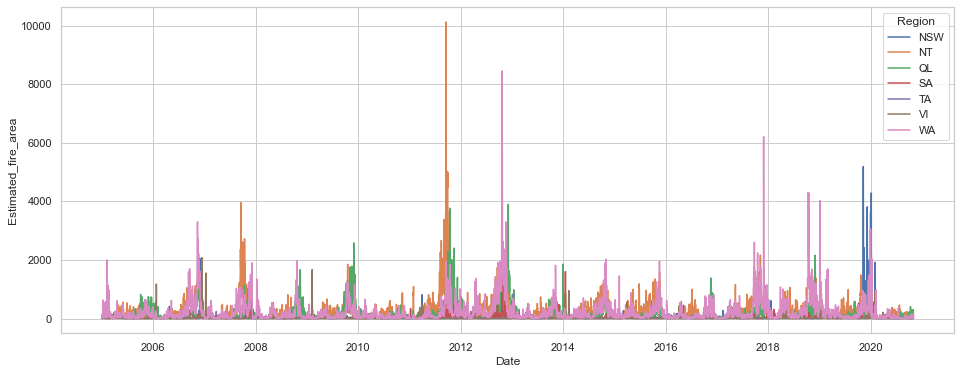

In [5]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region', data=wildfires_df)

Estimated Fire Areas Year to Year

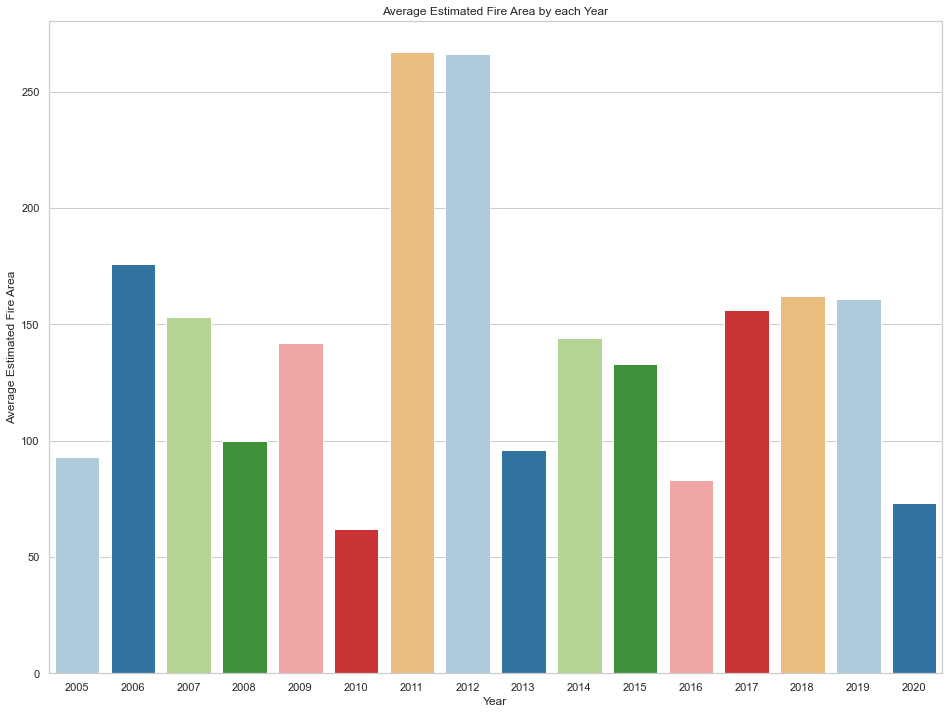

In [7]:
fire_areas = wildfires_df[['Region', 'Date', 'Estimated_fire_area']].copy()
fire_areas = fire_areas.drop_duplicates().sort_values(by=['Date']).reset_index(drop=True)
fire_areas['year'] = fire_areas['Date'].dt.year
fire_areas['month'] = fire_areas['Date'].dt.month

fire_year = fire_areas.groupby('year')[['Estimated_fire_area']].mean().round().reset_index()

plt.figure(figsize=(16, 12))
colors = sns.color_palette("Paired", 7)

fig = sns.barplot(x="year", y="Estimated_fire_area", data=fire_year, palette=colors)
fig.set_title('Average Estimated Fire Area by each Year')
fig.set(xlabel='Year', ylabel='Average Estimated Fire Area')
plt.show()

Average Estimated Fire Area in each Month by Year

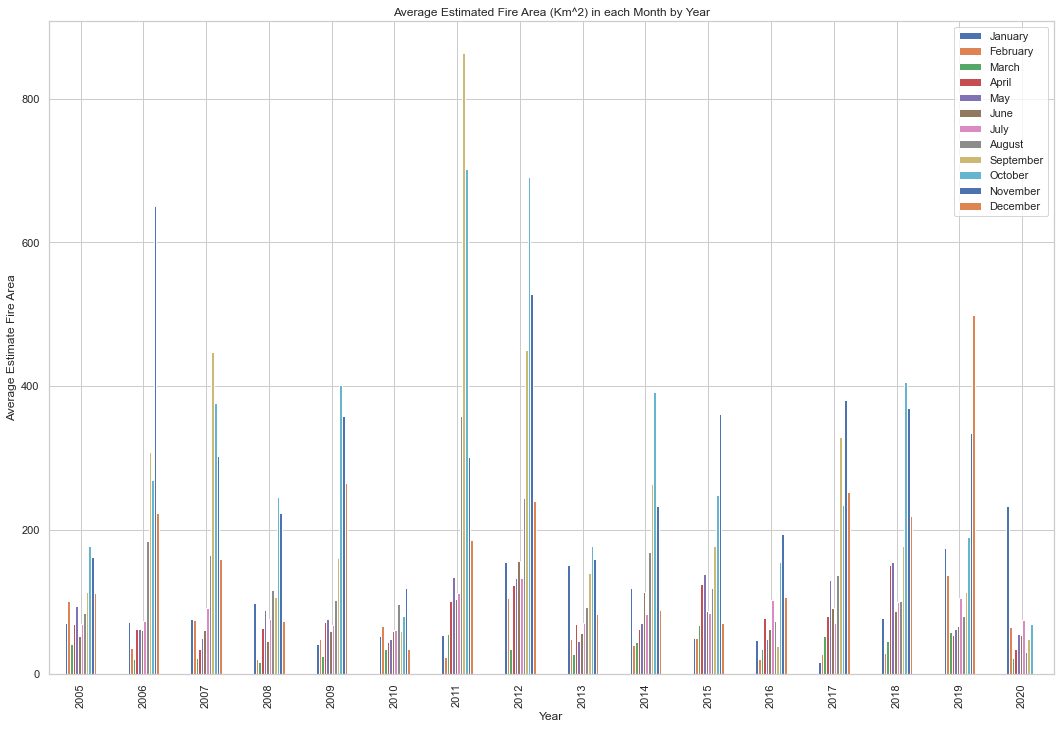

In [11]:
df_fire_bright = wildfires_df[['Region', 'Date', 'Estimated_fire_area', 'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power']].copy()
df_fire_bright['year'] = df_fire_bright['Date'].dt.year
df_fire_bright['month'] = df_fire_bright['Date'].dt.month
df_fire_bright['month_name'] = df_fire_bright['Date'].dt.strftime('%B')

f_area = df_fire_bright.groupby(['year', 'month'])[['Estimated_fire_area']].mean().round().reset_index()
f_area_wide = f_area.pivot(index='year', columns='month', values='Estimated_fire_area').fillna(0).copy()
list_of_months = pd.to_datetime(f_area['month'], format='%m').dt.strftime('%B').unique().tolist()

f_area_wide.plot(kind='bar', figsize=(18, 12))
plt.legend(labels=list_of_months)
plt.title("Average Estimated Fire Area (Km^2) in each Month by Year")
plt.xlabel("Year")
plt.ylabel("Average Estimate Fire Area")
plt.show()

Region-Wise Average of Estimated Fire Area by Year

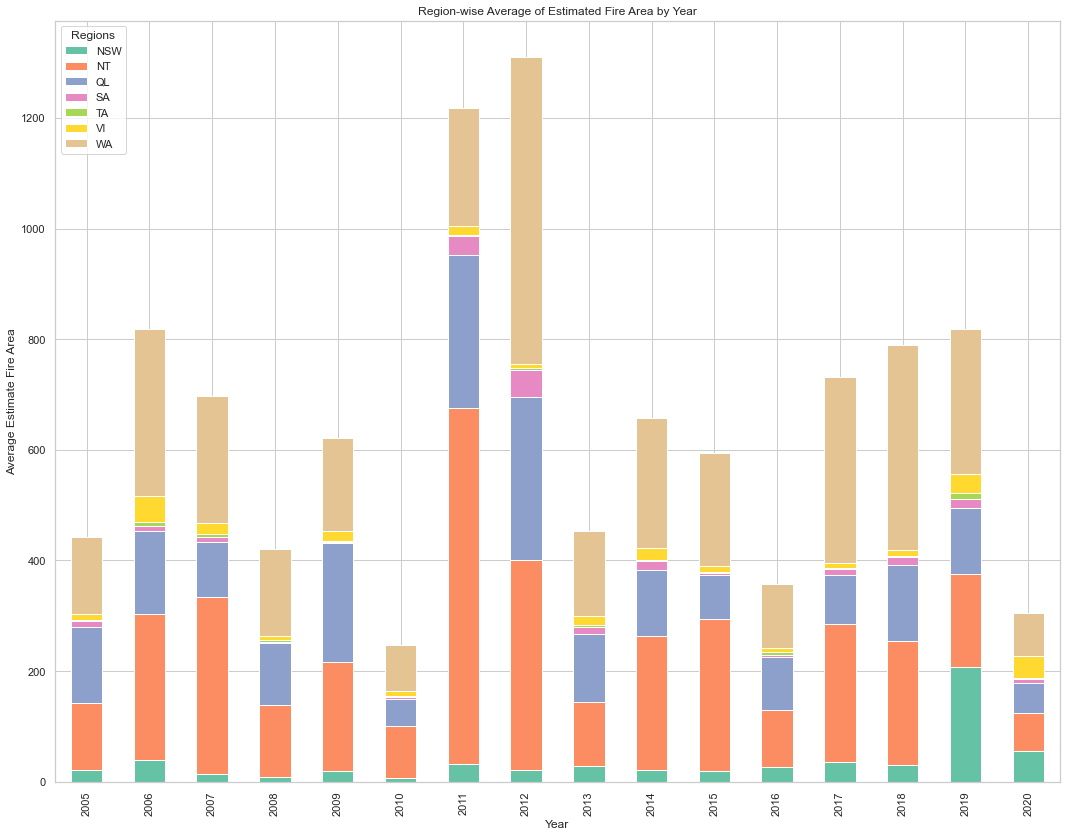

In [8]:
wide = fire_areas.pivot(index='Date', columns='Region', values='Estimated_fire_area').fillna(0).copy()
wide.reset_index(inplace=True)
wide['Year'] = wide['Date'].dt.year
wide['Month'] = wide['Date'].dt.month

temp_df = wide.groupby(['Year']).mean().round().reset_index()
temp_df.drop(['Month'], axis = 1, inplace=True)
temp_df.set_index('Year', inplace=True)

colors = sns.color_palette("Set2", 7)
temp_df.plot(kind="bar", stacked=True, figsize=(18, 14), color=colors).legend(loc='upper left', title="Regions")

plt.title("Region-wise Average of Estimated Fire Area by Year")
plt.xlabel("Year")
plt.ylabel("Average Estimate Fire Area")
plt.show()

Average Estimated Fire Areay by Year in Different Regions

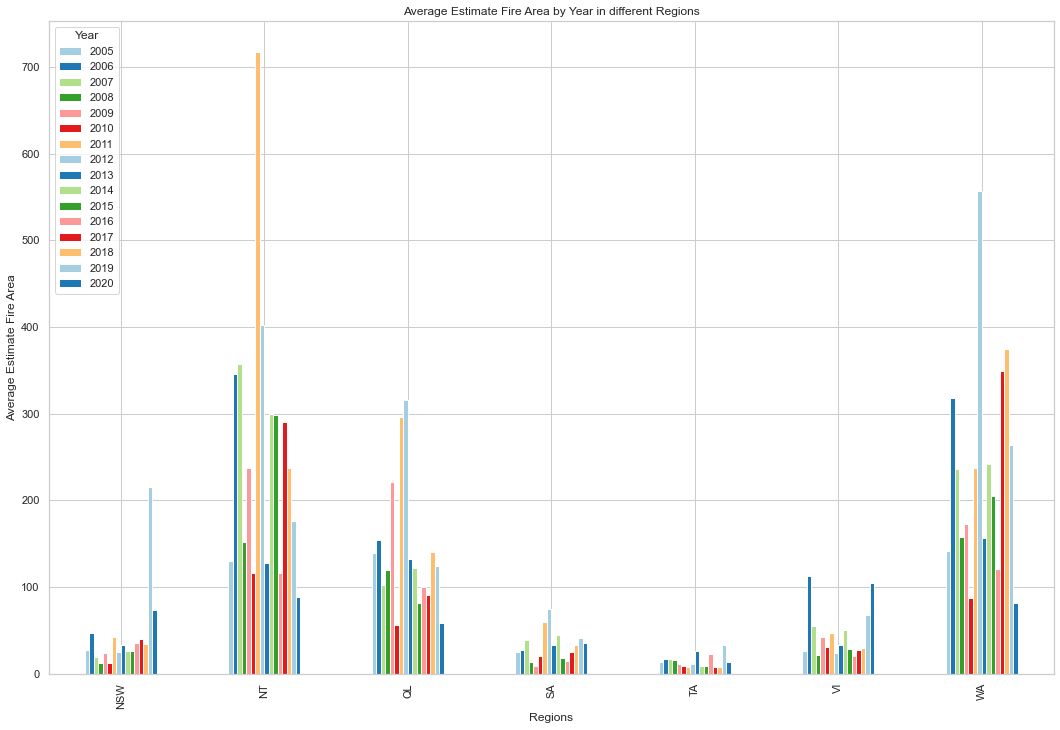

In [9]:
month_wise = fire_areas.copy()
month_wise['month'] = month_wise['Date'].dt.strftime('%Y %m')
month_wise = month_wise.sort_values(by=['Region', 'Date']).reset_index(drop=True)
month_wise = month_wise.groupby(['Region', 'year'])[['Estimated_fire_area']].mean().reset_index()
month_wise = month_wise.pivot(index='Region', columns='year', values='Estimated_fire_area').fillna(0).reset_index()
month_wise.set_index('Region', inplace=True)

# month_wise.plot(kind="bar", stacked=True, figsize=(16,14)).legend(loc='upper left', title="Regions")
colors = sns.color_palette("Paired", 7)
month_wise.plot(kind="bar", figsize=(18, 12), color=colors).legend(loc='upper left', title="Year")
plt.title("Average Estimate Fire Area by Year in different Regions")
plt.xlabel("Regions")
plt.ylabel("Average Estimate Fire Area")
plt.show()

Note:
The order of the following regions are for the purposes of looking at the areas sequentially as were reviewed in the previous notebook 3.1 B )  Historical Weather - Trends & Seasonality by Region with Paramaters - Year by Year:  
- 'NSW', 'QL', 'TA', 'WA' ** These areas appears to trend closely in weather parameters; it should be interesting to look at how they trend in historical wilfires over time.
- 'SA', 'NT', 'VI' ** These areas seemed to be unique in their weather patters with some unique elements happening in each, particular to each region, however, overall they were closely related.

#### Estimated Fire Area Year to Year - NSW Region <a class="anchor" id="FireAreaNSW"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='NSW'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - QL Region <a class="anchor" id="FireAreaQL"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='QL'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - TA Region <a class="anchor" id="FireAreaTA"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='TA'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - WA Region <a class="anchor" id="FireAreaWA"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='WA'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - 'NSW', 'QL', 'TA', 'WA' Regions <a class="anchor" id="FireArea1stFour"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='NSW') | 
                                   (wildfires_df['Region']=='QL') | 
                                   (wildfires_df['Region']=='TA') | 
                                   (wildfires_df['Region']=='WA')])
g.set_yscale("log")

Note: 
It will be useful to look at all together in each variation to see which ones are closes to one another in wilfire trend, in comparison to the following weather table trends/seasonality:

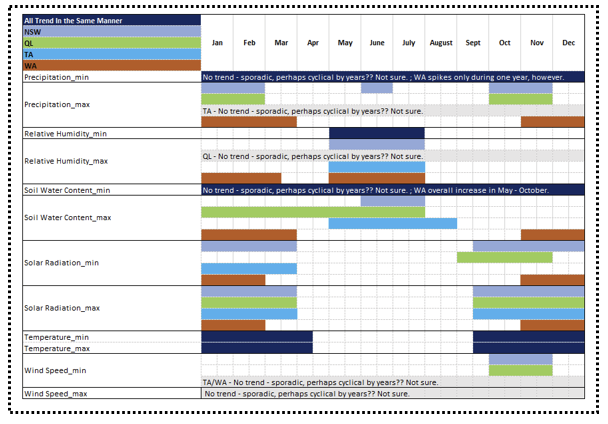

NSW vs. QL

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='NSW') | 
                                   (wildfires_df['Region']=='QL')])
g.set_yscale("log")

NSW vs TA

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='NSW') | 
                                   (wildfires_df['Region']=='TA')])
g.set_yscale("log")

NSW vs. WA

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='NSW') | 
                                   (wildfires_df['Region']=='WA')])
g.set_yscale("log")

Note: NSW and QL appear more closely related to each other (and also in weather trend/seasonality):

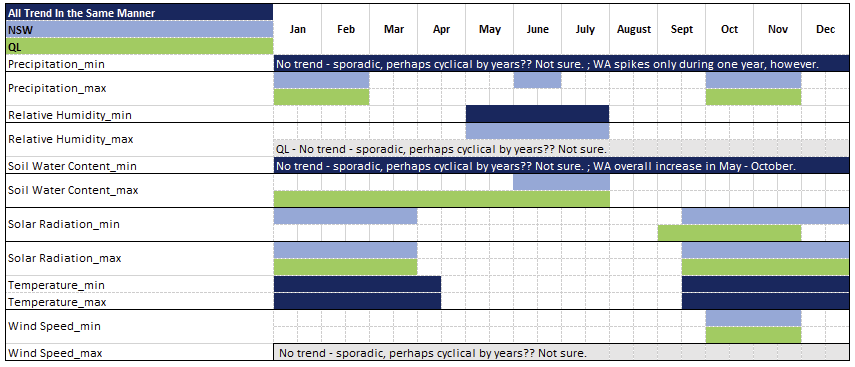

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='NSW') | 
                                   (wildfires_df['Region']=='QL')])
g.set_yscale("log")

Note: TA and WA appear more closely related to each other (and also in weather and trend/seasonlity)

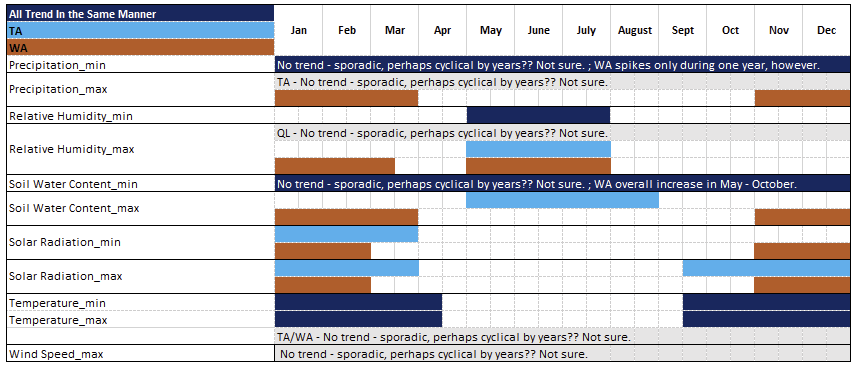

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='TA') | 
                                   (wildfires_df['Region']=='WA')])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - SA Region <a class="anchor" id="FireAreaSA"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='SA'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - NT Region <a class="anchor" id="FireAreaNT"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='NT'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - VI Region <a class="anchor" id="FireAreaVI"></a>

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[wildfires_df['Region']=='VI'])
g.set_yscale("log")

#### Estimated Fire Area Year to Year - 'SA', 'NT', and "VI' Region <a class="anchor" id="FireArea2ndset"></a>

Note: Doing a comparison of weather and wilfires trends for these three last regions as well

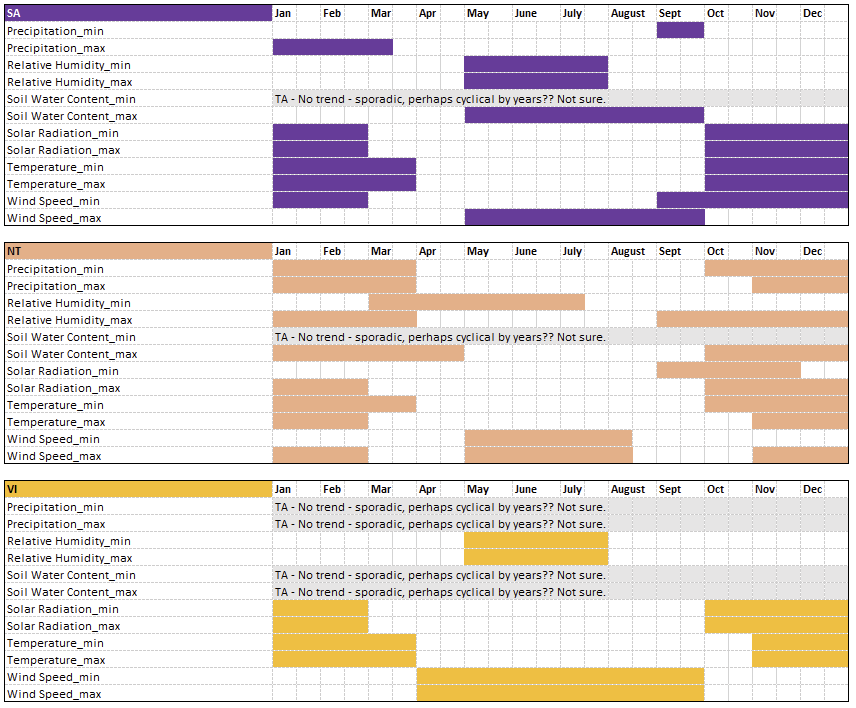

In [ ]:
plt.figure(figsize=(16, 6))
sns.set(style="whitegrid")
g = sns.lineplot(x="Date", y="Estimated_fire_area",hue='Region',
                 data=wildfires_df[(wildfires_df['Region']=='SA') | 
                                   (wildfires_df['Region']=='NT') | 
                                   (wildfires_df['Region']=='VI')])
g.set_yscale("log")